<a href="https://colab.research.google.com/github/PravalikaMuthoju/STAT_ML_PROJECT/blob/main/BREAST_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
d=pd.read_csv('/content/Breast_GSE45827.csv')
d

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


target variable

In [20]:
y = d['type']
y

,type
0,basal
1,basal
2,basal
3,basal
4,basal
...,...
146,luminal_B
147,luminal_B
148,luminal_B
149,luminal_B


features

In [22]:
x=d.drop('type',axis=1)
x

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [23]:
#SMOTE to balance data
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({'basal': 41, 'HER': 30, 'luminal_B': 30, 'luminal_A': 29, 'cell_line': 14, 'normal': 7})
Resampled class distribution: Counter({'basal': 41, 'HER': 41, 'cell_line': 41, 'normal': 41, 'luminal_A': 41, 'luminal_B': 41})


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled,test_size=0.7,random_state=30)


In [25]:
#Checking for NULL values
print(d.isnull())

     samples   type  1007_s_at  1053_at  117_at  121_at  1255_g_at  1294_at  \
0      False  False      False    False   False   False      False    False   
1      False  False      False    False   False   False      False    False   
2      False  False      False    False   False   False      False    False   
3      False  False      False    False   False   False      False    False   
4      False  False      False    False   False   False      False    False   
..       ...    ...        ...      ...     ...     ...        ...      ...   
146    False  False      False    False   False   False      False    False   
147    False  False      False    False   False   False      False    False   
148    False  False      False    False   False   False      False    False   
149    False  False      False    False   False   False      False    False   
150    False  False      False    False   False   False      False    False   

     1316_at  1320_at  ...  AFFX-r2-Ec-bioD-3_at  A

In [26]:
#datatypes
d.dtypes

,0
samples,int64
type,object
1007_s_at,float64
1053_at,float64
117_at,float64
...,...
AFFX-ThrX-5_at,float64
AFFX-ThrX-M_at,float64
AFFX-TrpnX-3_at,float64
AFFX-TrpnX-5_at,float64


In [27]:
y=d['type']
y


,type
0,basal
1,basal
2,basal
3,basal
4,basal
...,...
146,luminal_B
147,luminal_B
148,luminal_B
149,luminal_B


In [28]:
x=d.drop('type',axis=1)
x

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [29]:
#Normalization
dd=(x_resampled-x_resampled.min())/(x_resampled.max()-x_resampled.min())
dd


,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0.000000,0.562294,0.594520,0.461277,0.413825,0.315540,0.457464,0.185234,0.237430,0.637997,...,0.311625,0.418857,0.199085,0.221831,0.117509,0.182243,0.124503,0.396006,0.242731,0.708713
1,0.006494,0.565008,0.624829,0.638405,0.604744,0.456949,0.670148,0.281970,0.327875,0.497372,...,0.284087,0.398884,0.275012,0.215984,0.228454,0.254829,0.229114,0.341838,0.450726,0.246678
2,0.019481,0.623076,0.816796,0.270016,0.606032,0.429293,0.355424,0.097582,0.246094,0.707751,...,0.255341,0.360519,0.168370,0.080437,0.135304,0.223239,0.183150,0.193939,0.291606,0.429852
3,0.038961,0.539950,0.398081,0.476398,0.203472,0.494749,0.753674,0.492729,0.319419,0.657319,...,0.247876,0.357514,0.269214,0.245959,0.193033,0.229037,0.162878,0.506311,0.261869,0.651694
4,0.045455,0.456358,0.501303,0.536045,0.402572,0.480984,0.692044,0.423611,0.245698,0.705469,...,0.281456,0.422683,0.314633,0.271777,0.150080,0.188584,0.193738,0.378300,0.169604,0.498685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.571429,0.703118,0.175269,0.241126,0.315740,0.423469,0.877135,0.660498,0.337571,0.585147,...,0.809153,0.806107,0.860155,0.864042,0.883229,0.259504,0.591892,0.237095,0.206502,0.570440
242,0.584416,0.684675,0.180071,0.145928,0.620431,0.686834,0.895328,0.594230,0.264442,0.415528,...,0.946848,0.999735,0.953370,0.958235,0.723945,0.115191,0.307127,0.404589,0.333382,0.577799
243,0.597403,0.726999,0.084168,0.127541,0.677946,0.850149,0.855050,0.770692,0.308623,0.473077,...,0.960767,0.981058,0.971868,0.969648,0.700953,0.114027,0.276217,0.170565,0.324170,0.428561
244,0.564935,0.519772,0.181986,0.326870,0.400843,0.593449,0.839271,0.637186,0.285099,0.441639,...,0.740103,0.716159,0.796373,0.803422,0.850405,0.553090,0.718802,0.274518,0.236006,0.557926


In [30]:
#Splitting of Data
#  x train and y train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dd, y_resampled,test_size=0.7,random_state=30)
x_train


,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
34,0.389610,0.573380,0.487907,0.442113,0.351947,0.669791,0.628363,0.366569,0.439190,0.568028,...,0.525800,0.510415,0.502661,0.441260,0.308261,0.143502,0.229048,0.245566,0.547500,0.360608
44,0.071429,0.733648,0.544491,0.285254,0.356019,0.326103,0.591666,0.736983,0.298236,0.587492,...,0.262555,0.383163,0.247361,0.102351,0.102810,0.141241,0.151928,0.211036,0.285683,0.565110
52,0.149351,0.816550,0.421905,0.480436,0.464076,0.909633,0.508253,0.651004,0.322240,0.610062,...,0.443470,0.426253,0.408720,0.347277,0.273787,0.149629,0.230589,0.321503,0.479378,0.580370
49,0.123377,0.654372,0.536882,0.355111,0.551366,0.200213,0.710457,0.282918,0.070356,0.678909,...,0.272381,0.435291,0.265847,0.198954,0.158915,0.148998,0.105050,0.304917,0.347904,0.617462
158,0.103896,0.689213,0.473583,0.423045,0.281157,0.256009,0.594847,0.400059,0.304551,0.626356,...,0.278049,0.387547,0.269358,0.195136,0.141243,0.157454,0.140825,0.236696,0.241608,0.644260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.850649,0.806340,0.274195,0.503462,0.951409,0.733133,0.495465,0.737294,0.559951,0.323272,...,0.585761,0.557254,0.720987,0.676010,0.512385,0.549773,0.518851,0.494760,0.755743,0.432760
45,0.077922,0.683762,0.610960,0.380698,0.324221,0.527316,0.535619,0.597496,0.079976,0.465166,...,0.254443,0.374037,0.253679,0.192574,0.126071,0.184882,0.180197,0.292171,0.000000,0.457321
173,0.467532,0.636339,0.860380,0.329257,0.457022,0.730564,0.422915,0.360591,0.519713,0.253153,...,0.130660,0.218224,0.588676,0.505225,0.518747,0.692416,0.611126,0.326465,0.554924,0.552722
165,0.506494,0.379442,0.832483,0.229381,0.945287,0.386846,0.450231,0.299150,0.471656,0.346429,...,0.066142,0.066222,0.355031,0.332705,0.528040,0.585625,0.580219,0.540663,0.592204,0.772885


In [31]:
x_test

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
51,0.136364,0.780170,0.479381,0.379053,0.460671,0.556511,0.444605,0.912493,0.426569,0.364724,...,0.320999,0.465637,0.226957,0.220758,0.164765,0.134803,0.123817,0.283476,0.204860,0.809332
224,0.590909,0.730625,0.154568,0.207901,0.633535,0.935697,0.815408,0.747644,0.378793,0.432048,...,0.983095,0.979561,0.991140,0.987387,0.685170,0.163535,0.378765,0.047187,0.487993,0.466411
41,0.012987,0.665640,0.449225,0.573095,0.271378,0.680125,0.630717,0.239615,0.432345,0.496249,...,0.271523,0.406384,0.297525,0.237091,0.261487,0.286602,0.252305,0.179149,0.461900,0.590751
157,0.019481,0.640200,0.485370,0.542820,0.349132,0.759010,0.499864,0.318880,0.470701,0.483547,...,0.332874,0.448387,0.350635,0.286201,0.263077,0.299210,0.281623,0.265328,0.269523,0.829145
67,0.435065,0.626680,0.321515,0.619611,0.418508,0.613353,0.556996,0.269753,0.566958,0.626192,...,0.404263,0.391919,0.365684,0.421029,0.646631,0.879144,0.783653,0.079531,0.451807,0.231870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.694805,0.721688,0.360269,0.362526,0.375678,0.368512,0.725824,0.433181,0.570889,0.414448,...,0.344664,0.381654,0.598289,0.598754,0.492349,0.406665,0.440044,0.115087,0.429078,0.499851
16,0.181818,0.604335,0.620146,0.531334,0.192824,0.574026,0.613174,0.208740,0.438615,0.484881,...,0.310819,0.370483,0.409452,0.316734,0.286153,0.021244,0.109430,0.520960,0.491820,0.490822
234,0.603896,0.680053,0.054519,0.098504,0.755538,0.741281,0.879892,0.692653,0.312100,0.502646,...,0.883194,0.904446,0.926649,0.911119,0.752407,0.132194,0.291777,0.328820,0.137010,0.352223
28,0.331169,0.562342,0.698411,0.684173,0.459211,0.696966,0.603492,0.350558,0.489576,0.592083,...,0.326426,0.312339,0.311764,0.246980,0.271549,0.275475,0.289636,0.297551,0.448419,0.369909


In [32]:
y_train

,type
34,basal
44,HER
52,HER
49,HER
158,HER
...,...
140,luminal_B
45,HER
173,cell_line
165,cell_line


In [33]:
y_test

,type
51,HER
224,normal
41,HER
157,HER
67,HER
...,...
194,luminal_A
16,basal
234,normal
28,basal


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
13
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC




# SUPPORT VECTOR MACHINE

Accuracy 0.9421965317919075
              precision    recall  f1-score   support

         HER       0.82      0.96      0.88        24
       basal       0.96      0.90      0.93        30
   cell_line       1.00      1.00      1.00        24
   luminal_A       1.00      0.88      0.93        32
   luminal_B       0.88      0.93      0.90        30
      normal       1.00      1.00      1.00        33

    accuracy                           0.94       173
   macro avg       0.94      0.94      0.94       173
weighted avg       0.95      0.94      0.94       173



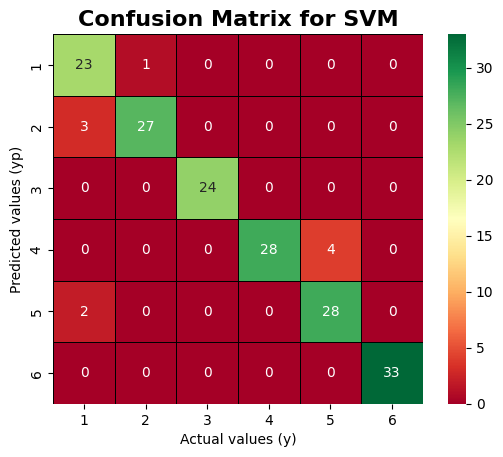

In [35]:


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = SVC(max_iter=1000)
m = lr.fit(x_train_scaled, y_train)

yp = m.predict(x_test_scaled)

print("Accuracy", accuracy_score(y_test, yp))
print(classification_report(y_test, yp))

cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, fmt="d", cmap='RdYlGn', cbar=True, linewidths=.5,linecolor='black', square=True)

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=[1,2,3,4,5,6])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], labels=[1,2,3,4,5,6])
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (yp)')
plt.title('Confusion Matrix for SVM', fontsize=16, fontweight='bold')
plt.show()





# PERCEPTRON

In [36]:
scaler = StandardScaler()

0.9364161849710982
              precision    recall  f1-score   support

         HER       0.95      0.88      0.91        24
       basal       0.91      0.97      0.94        30
   cell_line       1.00      1.00      1.00        24
   luminal_A       0.82      1.00      0.90        32
   luminal_B       1.00      0.77      0.87        30
      normal       1.00      1.00      1.00        33

    accuracy                           0.94       173
   macro avg       0.95      0.93      0.94       173
weighted avg       0.94      0.94      0.94       173



Text(77.92222222222227, 0.5, 'Predicted values (yp)')

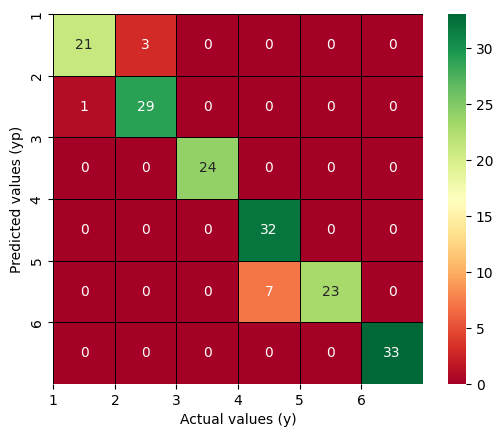

In [37]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = Perceptron(max_iter=1000)
m = lr.fit(x_train_scaled, y_train)
yp = m.predict(x_test_scaled)
print(accuracy_score(y_test, yp))
print(classification_report(y_test, yp))

cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, fmt="d", cmap='RdYlGn', cbar=True, linewidths=.5,
linecolor='black', square=True)
plt.xticks(ticks=[0,1,2,3,4,5], labels=[1,2,3,4,5,6])
plt.yticks(ticks=[0,1,2,3,4,5], labels=[1,2,3,4,5,6])
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (yp)')

# LOGISTIC REGRESSION

Accuracy 0.9479768786127167
              precision    recall  f1-score   support

         HER       0.88      0.96      0.92        24
       basal       0.96      0.90      0.93        30
   cell_line       1.00      1.00      1.00        24
   luminal_A       0.89      0.97      0.93        32
   luminal_B       0.96      0.87      0.91        30
      normal       1.00      1.00      1.00        33

    accuracy                           0.95       173
   macro avg       0.95      0.95      0.95       173
weighted avg       0.95      0.95      0.95       173



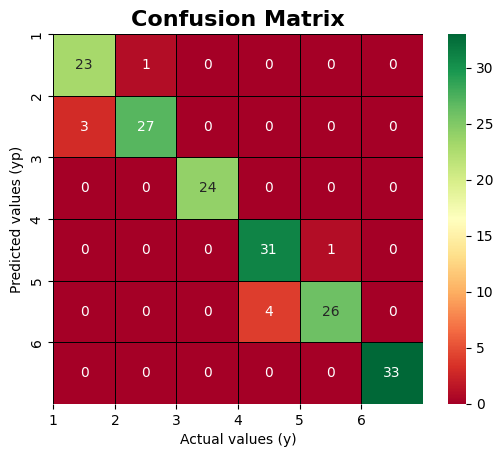

In [38]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression(max_iter=10000, solver='saga')
m = lr.fit(x_train_scaled, y_train)
yp = m.predict(x_test_scaled)
print("Accuracy",accuracy_score(y_test, yp))
print(classification_report(y_test, yp))
cm = confusion_matrix(y_test, yp)
sns.heatmap(cm, annot=True, fmt="d", cmap='RdYlGn', cbar=True, linewidths=.5,linecolor='black', square=True)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5,6])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5,6])
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (yp)')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()


# K-NEAREST NEIGHBORS (KNN)

Accuracy for KNN: 0.815028901734104
              precision    recall  f1-score   support

         HER       0.47      0.92      0.62        24
       basal       1.00      0.20      0.33        30
   cell_line       1.00      1.00      1.00        24
   luminal_A       0.94      0.91      0.92        32
   luminal_B       0.84      0.90      0.87        30
      normal       1.00      1.00      1.00        33

    accuracy                           0.82       173
   macro avg       0.87      0.82      0.79       173
weighted avg       0.89      0.82      0.79       173



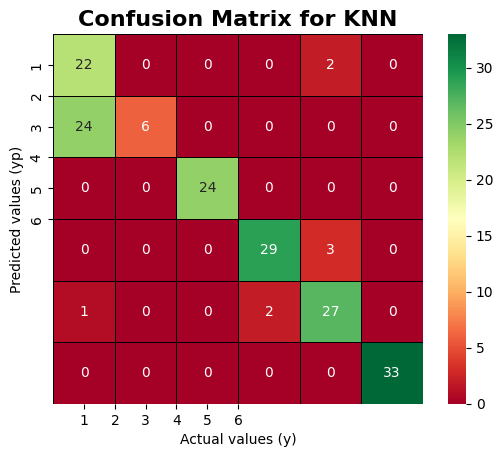

In [40]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_scaled, y_train)
yp_knn = knn.predict(x_test_scaled)

print("Accuracy for KNN:", accuracy_score(y_test, yp_knn))
print(classification_report(y_test, yp_knn))

cm_knn = confusion_matrix(y_test, yp_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='RdYlGn', cbar=True, linewidths=.5,linecolor='black', square=True)
plt.xticks(ticks=[0.5, 1, 1.5, 2, 2.5, 3], labels=[1,2,3,4,5,6])
plt.yticks(ticks=[0.5, 1, 1.5, 2, 2.5, 3], labels=[1,2,3,4,5,6])
plt.xlabel('Actual values (y)')
plt.ylabel('Predicted values (yp)')
plt.title('Confusion Matrix for KNN', fontsize=16, fontweight='bold')
plt.show()